In [1]:
def nop():
    pass

In [2]:
nop()

In [4]:
age = 25
if age>20:
    pass

In [2]:
def test():
    name = 'fei'
    age = 25
    
    return name , age

In [6]:
r = test()
print(r) #返回多个参数 实际返回的是一个tuple

('fei', 25)


In [3]:
print(type(test()))

<class 'tuple'>


In [4]:
def mabs(number):
    '''
    number : input number
    '''
    if not isinstance(number , (int , float)):
        raise TypeError('haha type error')
    else:
        return abs(number)



In [10]:
print(mabs(-5))

5


In [11]:
print(mabs('f'))

TypeError: haha type error

In [5]:
type(abs)

builtin_function_or_method

In [8]:
isinstance(abs , (builtin_function_or_method))

NameError: name 'builtin_function_or_method' is not defined

In [14]:
#默认参数 必须指向不可变类型变量
def add(L=[]):
    L.append('haha')
    return L

In [15]:
add()

['haha']

In [16]:
add()
#下面的情形就是默认参数坑（多运行几次看现象）

['haha', 'haha']

### 原因如下：
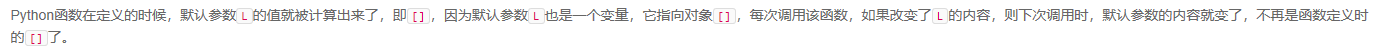

In [19]:
#应该下面的使用方式
def addd(L=None):
    if L is None:
        L = []
    L.append('gg')
    return L

In [20]:
addd()

['gg']

In [21]:
addd()

['gg']

In [22]:
#为什么要设计str、None这样的不变对象呢？因为不变对象一旦创建，对象内部的数据就不能修改，
#这样就减少了由于修改数据导致的错误。此外，由于对象不变，
#多任务环境下同时读取对象不需要加锁，同时读一点问题都没有。我们在编写程序时，如果可以设计一个不变对象，那就尽量设计成不变对象。

# 可变参数

# 传进去变为tuple

In [18]:
def my_sum(*number):
    s = 0
    
    for n in number:
        s += n
    
    return s


In [26]:
numbers = [1,2,3,4]
my_sum(numbers[0] , numbers[1],numbers[2],numbers[3])
my_sum(*numbers) #这种方式传入list和tuple都可以

10

In [25]:
my_sum(2,3,4,5)

14

In [22]:
tt = (2,3,4,5)
my_sum(*tt)

14

# 关键字参数

# 也可以使用**符号  直接引用一个dict 
# 且**获得的是实参的一份拷贝 函数内修改不会影响实参

In [23]:
def enroll(name , age , **kw):
    print('name:',name , 'age:',age , 'extra:',kw)

In [29]:
enroll('fei' , 22)

name: fei age: 22 extra: {}


In [31]:
enroll('fei' , 22 , city = 'xi\'an' , level = 1)

name: fei age: 22 extra: {'city': "xi'an", 'level': 1}


In [32]:
tst = {'job':'student' , 'home':'yan'}
enroll('fei' , 22 , job = tst['job'] , home = tst['home'])
enroll('fei' , 22 , **tst)

name: fei age: 22 extra: {'job': 'student', 'home': 'yan'}


In [24]:
enroll('fei',24,sex='man',hobby='pingpang')

name: fei age: 24 extra: {'sex': 'man', 'hobby': 'pingpang'}


# 命名关键字参数

In [34]:
#引例
def check(name , age , **kw):
    if 'city' in kw:
        #have city
        pass

    if 'job' in kw:
        #have job
        pass
    
    print('name:',name , 'age:',age , 'extra:',kw)

In [35]:
#仍然可以传入不受限制的参数
check('fei', 22, city='xian', addr='yan', zipcode=123456)

name: fei age: 22 extra: {'city': 'xian', 'addr': 'yan', 'zipcode': 123456}


In [27]:
#如果要限制关键字参数 可以使用命名关键字参数
def checkk(name , age , * , city , job): #*后面的参数被视为命名关键字参数
    print(name , age , city , job)

In [28]:
checkk('fei' , 22 , city = 'xian' , job = 'yan')
#命名关键字参数必须传入参数名，这和位置参数不同。如果没有传入参数名，调用将报错
#如果不写参数名 Python解释器把这4个参数均视为位置参数，但checkk()函数仅接受2个位置参数。

fei 22 xian yan


In [29]:
checkk('fei' , 22 , 'xian' , 'yan')
#报错原因见上一个block

TypeError: checkk() takes 2 positional arguments but 4 were given

In [ ]:
#如果函数定义中已经有了一个可变参数，后面跟着的命名关键字参数就不再需要一个特殊分隔符*了
def checkkk(name , age , *argv , city , job):
    print(name , age , argv , city , job)

In [31]:
#命名关键字参数 可以有默认值
def checkkkk(name , age , * , city = 'xian' , job):
    print(name , age  , city , job)

checkkkk('fei' , 22 , job = 'student')

fei 22 xian student


In [ ]:
# 使用命名关键字参数时，要特别注意，如果没有可变参数，就必须加一个*作为特殊分隔符
# 如果缺少* python解释器将无法识别位置参数和命名关键字参数

def tttest(name , age , city , job):
    '''
    四个参数全部为 位置参数了
    '''
    pass


In [ ]:
#参数定义的顺序必须是：必选参数、默认参数、可变参数、命名关键字参数和关键字参数

# 对于任何函数 都可以通过func(*args , **kw)的形式进行调用 无论其参数时如何定义的 
# args被解析为tuple kw被解析为dict

# 尾递归是指，在函数返回的时候，调用自身本身，并且，return语句不能包含表达式 
# 这样，编译器或者解释器就可以把尾递归做优化，使递归本身无论调用多少次，都只占用一个栈帧，不会出现栈溢出的情况。
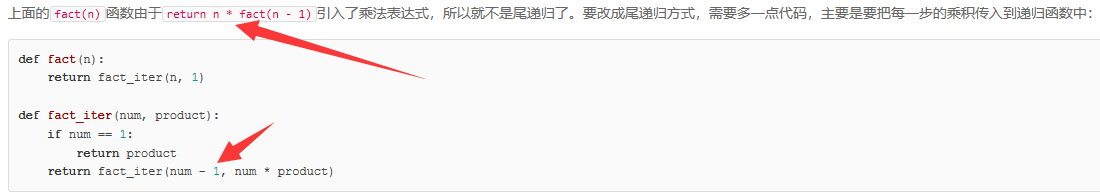

In [41]:

def fact_iter(num, product):
    if num == 1:
        return product
    return fact_iter(num - 1, num * product)


In [42]:
fact_iter(5 , 1)

120